# Robust linear estimator fitting
We fit a sine function.!
Robust fitting test is in 3 situtations:
- No outliers
- Outliers in X, small/large
- Outliers in y, small/large

We use median absolute error to jude the quality of the prediction.

In [47]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import (
    LinearRegression,
    RANSACRegressor,
    HuberRegressor,
    TheilSenRegressor
)
from sklearn.metrics import median_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [48]:
np.random.seed(42)

In [49]:
X = np.random.normal(size=400)
y = np.sin(X)
X = X[:, np.newaxis] # Make sure X 2d

In [50]:
X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

In [51]:
y_errors = y.copy()
y_errors[::3] = 3 # 标记一些X为3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

In [52]:
estimators = [
    ("OLS", LinearRegression()),
    ('Theil-Sen', TheilSenRegressor(random_state=42)),
    ('RANSAC', RANSACRegressor(random_state=42)),
    ('HuberRegressor',HuberRegressor())
]
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
}
linestyle = {
    "OLS": "-", 
    "Theil-Sen": "-.", 
    "RANSAC": "--", 
    "HuberRegressor": "--"
}
lw = 3

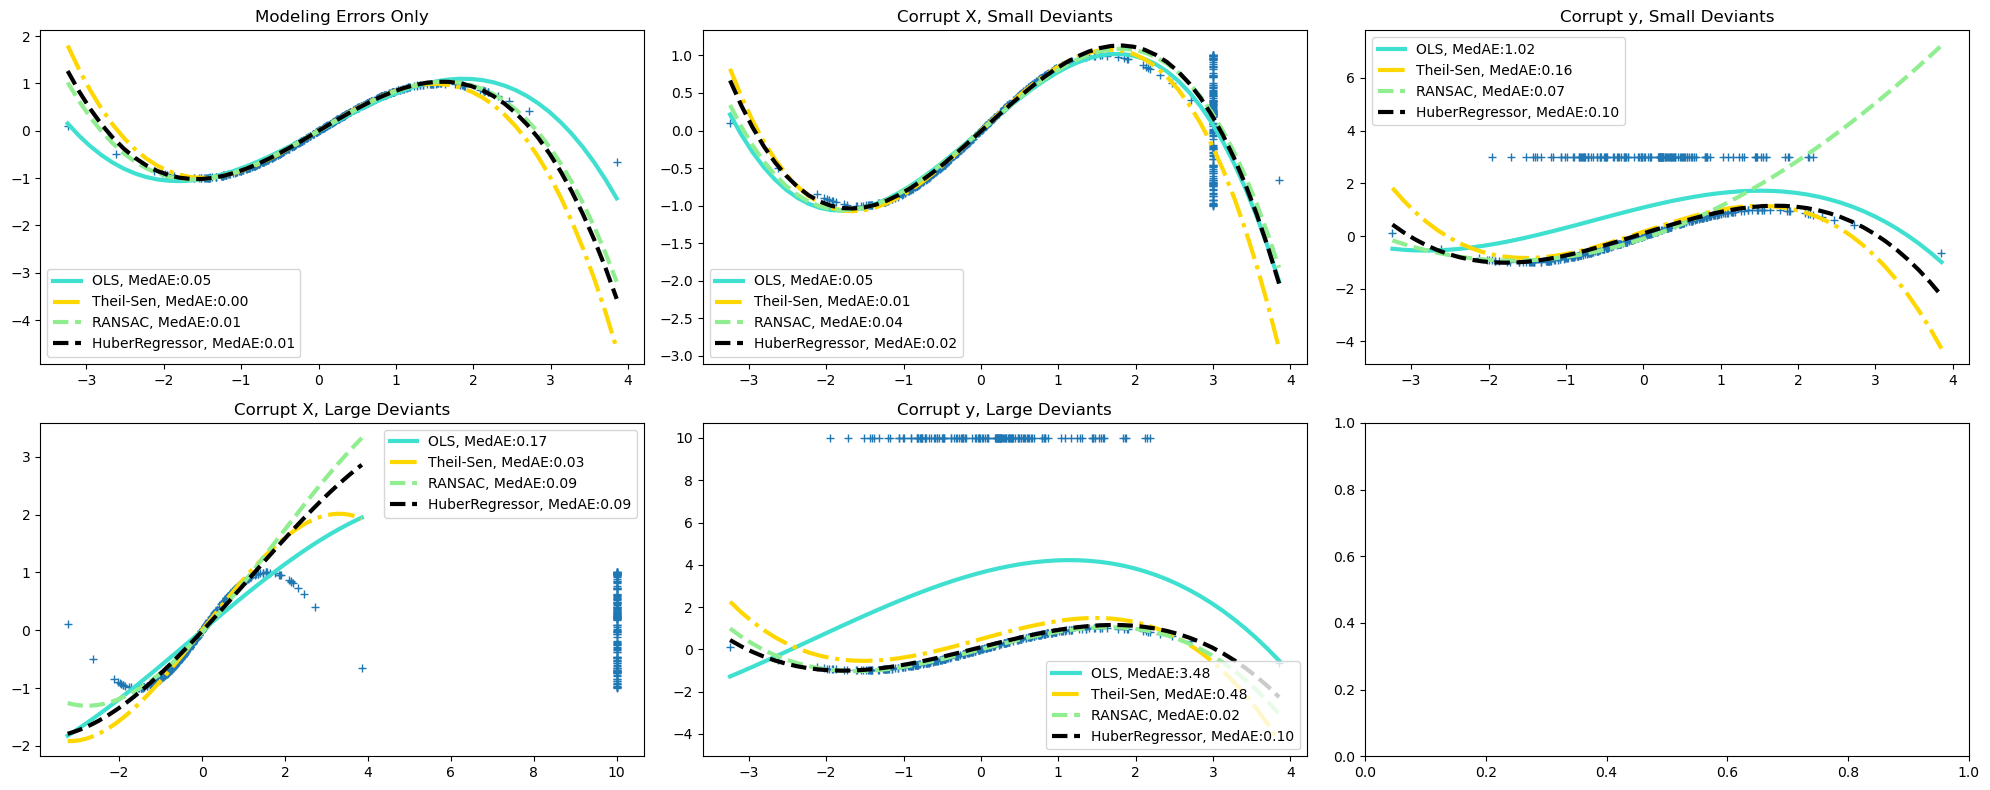

In [55]:
x_plot = np.linspace(X.min(),X.max()) # 回归线
fig,axes = plt.subplots(2,3, figsize=(20,8))
axes = axes.ravel()
for title, this_X, this_y,ax in [
    ("Modeling Errors Only", X, y,axes[0]),
    ("Corrupt X, Small Deviants", X_errors, y,axes[1]),
    ("Corrupt y, Small Deviants", X, y_errors,axes[2]),
    ("Corrupt X, Large Deviants", X_errors_large, y,axes[3]),
    ("Corrupt y, Large Deviants", X, y_errors_large,axes[4]),
]:
    ax.plot(this_X[:,0], this_y,'+')
    ax.set_title(title)
    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3),estimator)
        model.fit(this_X, this_y)
        mse = median_absolute_error(model.predict(X_test),y_test) #预测mse
        y_plot = model.predict(x_plot[:,np.newaxis])
        ax.plot(x_plot,y_plot,color=colors[name],
               linestyle=linestyle[name],
               linewidth=lw,
                label=f"{name}, MedAE:{mse:.2f}"
               )
    ax.legend()
fig.tight_layout()

📈
- Outliers have big impact on OLS-Linear regressor.
- RANSAC is best for y outliers.
- Thelil-Sen is best for X outliers